In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
columns = ['ST004D01T','IC001Q04TA','ESCS','WEALTH','EMOSUPS','GFOFAIL','SWBP','RESILIENCE','BELONG']
data = pd.read_csv("Downloads/data5.csv",usecols=columns) 
data.head()

,ST004D01T,IC001Q04TA,ESCS,WEALTH,EMOSUPS,GFOFAIL,SWBP,RESILIENCE,BELONG
0,1,2.0,-1.9067,-1.3354,-0.6576,1.1422,-0.5928,-0.8547,-1.3850
1,1,2.0,-1.9768,-1.3359,-1.3914,0.4637,0.7301,-0.8738,-0.6765
2,1,1.0,-2.5606,-1.4253,-0.6576,1.3423,-1.3186,-1.0974,-1.0425
3,2,1.0,-0.3868,-1.1210,-1.5824,1.1422,-1.8489,-1.2865,-1.0654
4,2,1.0,-1.2306,-0.9500,-0.6576,-0.6870,-0.5928,-0.0614,-0.4450


In [3]:
df = pd.DataFrame(data)
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna() # drop all nan


In [6]:
df = pd.DataFrame(data)
X = df[df.columns[~df.columns.isin(['RESILIENCE'])]]
Y = df['RESILIENCE']
x_train, x_test, y_train, y_test = train_test_split(X, Y.astype('float'), test_size=0.20, random_state=53)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [7]:
regressor = RandomForestRegressor(n_estimators = 100, max_depth = 20, oob_score = True, random_state = 42, max_features = "auto", min_samples_leaf = 25)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
    
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.2507819509184811

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, max_depth = 20, oob_score = True, random_state = 42, max_features = "auto", min_samples_leaf = 25)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
    
mean_squared_error(y_test, y_pred)

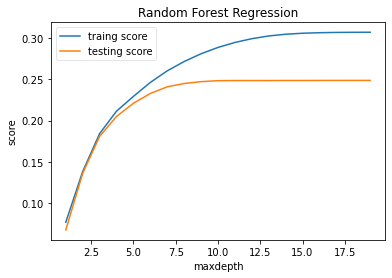

In [9]:
training_scores=[]
testing_scores=[]
depths = 20
for depth in range(1,depths):
    regressor = RandomForestRegressor(n_estimators = 100, max_depth = depth, oob_score = True, random_state = 42, max_features = "auto", min_samples_leaf = 50)
    regressor.fit(x_train, y_train)
    training_scores.append(regressor.score(x_train,y_train))
    testing_scores.append(regressor.score(x_test,y_test))

fig=plt.figure()
depths=np.arange(1,depths)
ax=fig.add_subplot(1,1,1)
ax.plot(depths,training_scores,label="traing score")
ax.plot(depths,testing_scores,label="testing score")
ax.set_xlabel("maxdepth")
ax.set_ylabel("score")
ax.set_title("Random Forest Regression")
ax.legend(framealpha=0.5)
plt.show()